In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [3]:
df = pd.read_csv('fer2013.csv')

In [4]:
# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

In [5]:
dictionary = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [6]:
X_train = np.zeros((28709,48,48),dtype=np.uint8)
X_test = np.zeros((7178,48,48),dtype=np.uint8)

Y_train = np.zeros(28709,dtype=np.uint8)
Y_test = np.zeros(7178,dtype=np.uint8)

In [7]:
count_test = 0
for i in range(len(df)):
    txt = df['pixels'][i]
    words = txt.split()

    if i < 28709:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_train[i][row][col] = atoi(words[j])

        Y_train[i] = df['emotion'][i]
        
    else:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_test[count_test][row][col] = atoi(words[j])

        Y_test[count_test] = df['emotion'][i]
        count_test += 1

In [8]:
#Normailizing our Data so that we get pixels between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [9]:
model_final = models.Sequential([
    #Convolutional Layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    #Dense Neural Network
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')
])

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
model_final.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model_final_details = model_final.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
898/898 [==============================] - 296s 325ms/step - loss: 1.7568 - accuracy: 0.2863 - val_loss: 1.5691 - val_accuracy: 0.3934
Epoch 2/10
898/898 [==============================] - 291s 324ms/step - loss: 1.5184 - accuracy: 0.4131 - val_loss: 1.4118 - val_accuracy: 0.4582
Epoch 3/10
898/898 [==============================] - 291s 324ms/step - loss: 1.3854 - accuracy: 0.4684 - val_loss: 1.2893 - val_accuracy: 0.5050
Epoch 4/10
898/898 [==============================] - 290s 323ms/step - loss: 1.2839 - accuracy: 0.5099 - val_loss: 1.2251 - val_accuracy: 0.5261
Epoch 5/10
898/898 [==============================] - 290s 323ms/step - loss: 1.1991 - accuracy: 0.5473 - val_loss: 1.1885 - val_accuracy: 0.5474
Epoch 6/10
898/898 [==============================] - 291s 324ms/step - loss: 1.1317 - accuracy: 0.5714 - val_loss: 1.1437 - val_accuracy: 0.5626
Epoch 7/10
898/898 [==============================] - 290s 323ms/step - loss: 1.0630 - accuracy: 0.6027 - val_loss: 1.1083 -

In [12]:
train_loss = model_final_details.history['loss']
val_loss = model_final_details.history['val_loss']
train_acc = model_final_details.history['accuracy']
val_acc = model_final_details.history['val_accuracy']
xc=range(10)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


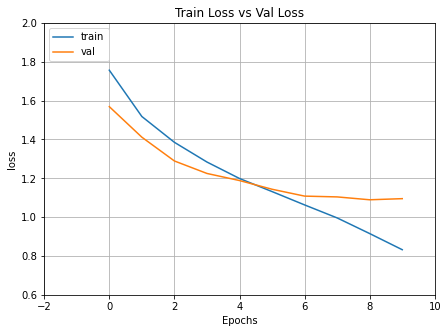

In [13]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train Loss vs Val Loss')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [17]:
plt.savefig('Train Loss VS Val Loss.png')

<Figure size 432x288 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


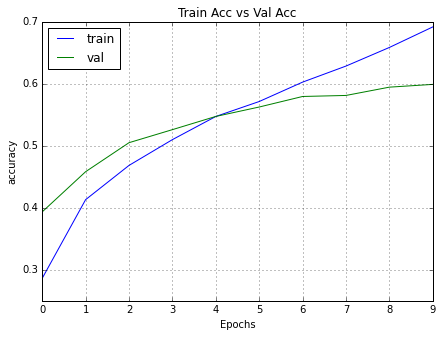

In [18]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Train Acc vs Val Acc')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [19]:
plt.savefig('Train Acc vs Val Acc.png')

<Figure size 640x480 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


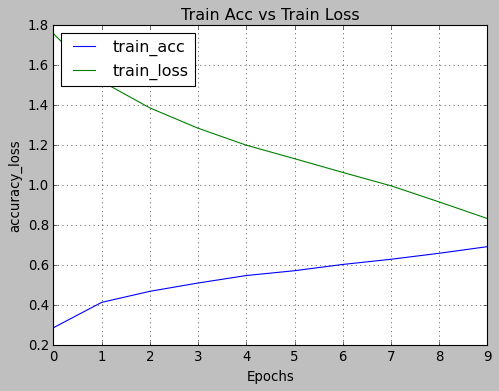

In [20]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,train_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Train Acc vs Train Loss')
plt.grid(True)
plt.legend(['train_acc','train_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [21]:
plt.savefig('Train Acc vs Train Loss.png')

<Figure size 640x480 with 0 Axes>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


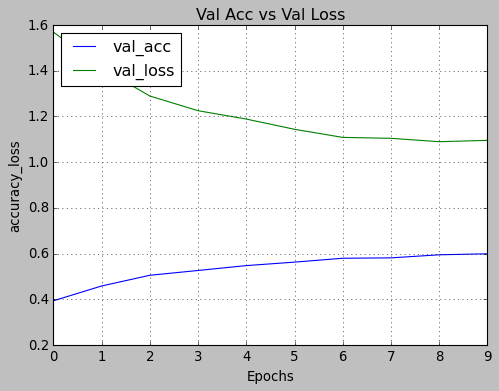

In [22]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,val_acc)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Val Acc vs Val Loss')
plt.grid(True)
plt.legend(['val_acc','val_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

In [23]:
plt.savefig('Val Acc VS Val Loss.png')

<Figure size 640x480 with 0 Axes>

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model_final.save('model2_final.h5')

In [26]:
model_hist_df = pd.DataFrame(model_final_details.history)
with open('model2_history.csv', mode='w') as f:
    model_hist_df.to_csv(f)

In [28]:
from contextlib import redirect_stdout

with open('model2_summary.txt', mode='w') as f:
    with redirect_stdout(f):
        model_final.summary()